# Mini Project - Building Classifiers 

#### Problem statement: 
A dataset collected in a cosmetics shop showing details of customers and whether or not they responded to a special offer to buy a new lip-stick is shown in table below. Use this dataset to build a classifier with ‘buys’ as the target variable, to help in buying lip-sticks in the future and write a report covering following points: -

·     Build classifiers with logistic regression and at least one other classification method like SVM or Decision tree.

·     Find goodness of fits for each classifier.

·     Compare performance among classifiers.

### Step 1: Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree, metrics, linear_model
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tabulate import tabulate

### Step 2: Import and the data

In [2]:
data_file ="./cosmetic.csv"
data = pd.read_csv(data_file, sep=",")

### Step 3: Explore and Analyze data

In [3]:
data.shape

(14, 5)

In [4]:
data.head()

,age,income,gender,marital status,buys
0,0,2,0,0,0
1,0,2,0,1,0
2,1,2,0,0,1
3,2,1,0,0,1
4,2,0,1,0,1


In [5]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
age               14 non-null int64
income            14 non-null int64
gender            14 non-null int64
marital status    14 non-null int64
buys              14 non-null int64
dtypes: int64(5)
memory usage: 640.0 bytes


In [6]:
data.describe()

,age,income,gender,marital status,buys
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1.000000,1.000000,0.500000,0.500000,0.642857
std,0.877058,0.784465,0.518875,0.518875,0.497245
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.500000,0.500000,1.000000
75%,2.000000,1.750000,1.000000,1.000000,1.000000
max,2.000000,2.000000,1.000000,1.000000,1.000000


### Step 4: Analyze the exploratory data

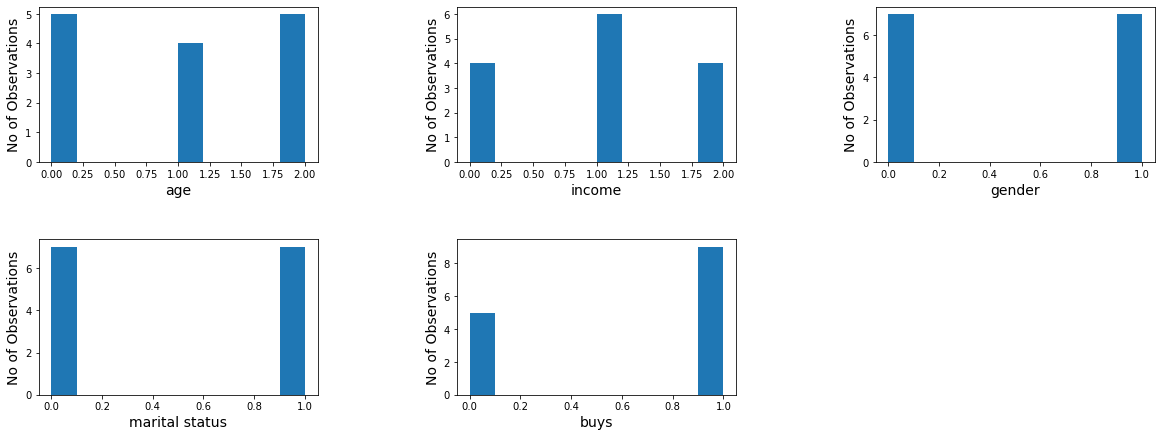

In [7]:
fig = plot.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, columns in zip(range(1, 6),data.columns):
    ax = fig.add_subplot(5, 3, i)
    ax.hist(data[columns])
    plot.xlabel(columns, fontsize="14")
    plot.ylabel('No of Observations', fontsize="14")

### Step 5: plotting of target data

In [8]:
count=data.groupby(data["buys"])['buys'].count()
print(count)

buys
0    5
1    9
Name: buys, dtype: int64


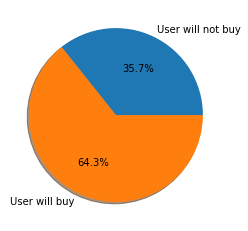

In [9]:
plot.pie(count, autopct='%1.1f%%', shadow=True, labels=['User will not buy','User will buy']);

### Step 6: Standardise the input data

In [10]:
input_data = data.iloc[:,:-1].values
target = data.iloc[:,-1].values

St=StandardScaler()
x=St.fit_transform(input_data)

# Classifier 1: Decision Tree

### Step 7: Create a Decison tree Model

In [11]:
dtree=DecisionTreeClassifier(criterion='entropy',random_state=0)

### Step 8: Train the Decision Tree Model and Predict output

In [12]:
dtree.fit(x,target)

y_pred=dtree.predict(x)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

### Step 9: Measure the Accuracy of Decision Tree model and plot the decision tree

In [13]:
entropy=accuracy_score(target,y_pred)
Accuracy_tree=round(entropy*100,2)
print("Accuracy: %0.2f" % (Accuracy_tree))
cm1=metrics.confusion_matrix(target,y_pred)
print(cm1)
print(classification_report(target,y_pred))

Accuracy: 100.00
[[5 0]
 [0 9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



### Step 10: Plot the decision tree 

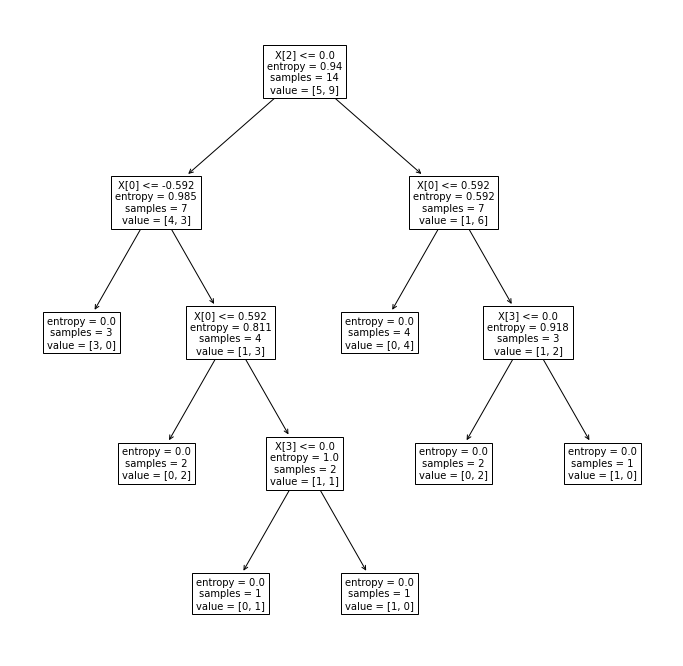

In [14]:
fig, ax = plot.subplots(figsize=(12, 12))
tree.plot_tree(dtree,fontsize=10);
plot.show()

# Classifier 2: Logistic Regression

### Step 11: Create a Logistic Regression Model

In [15]:
reg=LogisticRegression()

### Step 12: Train the Logistic Regression Model and Predict output

In [16]:
reg.fit(x,target)
y_pred=reg.predict(x)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

### Step 13: Measure the Accuracy of Logistic Regression Model

In [17]:
entropy=accuracy_score(target,y_pred)
Accuracy_LR=round(entropy*100,2)
print("Accuracy: %0.2f" % (Accuracy_LR))
cm2=metrics.confusion_matrix(target,y_pred)
print(cm2)
print(classification_report(target,y_pred))

Accuracy: 71.43
[[2 3]
 [1 8]]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.73      0.89      0.80         9

    accuracy                           0.71        14
   macro avg       0.70      0.64      0.65        14
weighted avg       0.71      0.71      0.69        14



# Classifier 3: SMV

### Step 14: Create a SMV Model

In [18]:
classifier = SVC(kernel = 'linear',random_state = 0)

### Step 15: Train the SMV model and Predict output

In [19]:
classifier.fit(x,target)
y_pred=reg.predict(x)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

### Step 16: Measure the Accuracy of SMV model

In [20]:
entropy=accuracy_score(target,y_pred)
Accuracy_smv=round(entropy*100,2)
print("Accuracy: %0.2f" % (Accuracy_smv))
cm3=metrics.confusion_matrix(target,y_pred)
print(cm3)
print(classification_report(target,y_pred))

Accuracy: 71.43
[[2 3]
 [1 8]]
              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.73      0.89      0.80         9

    accuracy                           0.71        14
   macro avg       0.70      0.64      0.65        14
weighted avg       0.71      0.71      0.69        14



# Classifier 4: Random Forest

### Step 17: Create a Random Forest Model

In [21]:
regressor2=RandomForestClassifier(n_estimators=50)

### Step 18: Train the Random Forest Model and Predict output

In [22]:
regressor2.fit(x,target)
y_pred=regressor2.predict(x)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

### Step 19: Measure the Accuracy of Random Forest Model

In [23]:
entropy=accuracy_score(target,y_pred)
Accuracy_RF=round(entropy*100,2)
print("Accuracy: %0.2f" % (Accuracy_RF))
cm4=metrics.confusion_matrix(target,y_pred)
print(cm4)
print(classification_report(target,y_pred))

Accuracy: 100.00
[[5 0]
 [0 9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



# Classifier 5: KNeighborsClassifier

### Step 20: Create a K-Neighbour Classifier Model

In [24]:
knn = KNeighborsClassifier(n_neighbors=4) 

### Step 21: Train the K-Neighbour Classifier Model and Predict output

In [25]:
knn.fit(x,target) 
y_pred=knn.predict(x)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

### Step 22: Measure the Accuracy of K-Neighbour Classifier Model

In [26]:
entropy=accuracy_score(target,y_pred)
Accuracy_knn=round(entropy*100,2)
print("Accuracy: %0.2f" % (Accuracy_knn))
cm5=metrics.confusion_matrix(target,y_pred)
print(cm5)
print(classification_report(target,y_pred))

Accuracy: 78.57
[[4 1]
 [2 7]]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.88      0.78      0.82         9

    accuracy                           0.79        14
   macro avg       0.77      0.79      0.78        14
weighted avg       0.80      0.79      0.79        14



# Classifier 6: Naive Bayes

### Step 23: Create a Naive Bayes Model

In [27]:
gnb = GaussianNB() 

### Step 24: Train the Naive Bayes Model and Predict output

In [28]:
gnb.fit(x, target) 
y_pred = gnb.predict(x) 
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

### Step 25: Measure the Accuracy of Naive Bayes Model

In [29]:
entropy=accuracy_score(target,y_pred)
Accuracy_NB=round(entropy*100,2)
print("Accuracy: %0.2f" % (Accuracy_NB))
cm6=metrics.confusion_matrix(target,y_pred)
print(cm6)
print(classification_report(target,y_pred))

Accuracy: 78.57
[[4 1]
 [2 7]]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.88      0.78      0.82         9

    accuracy                           0.79        14
   macro avg       0.77      0.79      0.78        14
weighted avg       0.80      0.79      0.79        14



### Step 25: Tabulate the data

In [30]:
print ("\tAccuracy by various Models of Classifiers")
print(tabulate([['Logistic Regression         :', Accuracy_LR, cm2], ['Decison tree                :', Accuracy_tree, cm1], ['SMV                         :', Accuracy_smv, cm3], ['Random Forest               :', Accuracy_RF, cm4], ['K-Neighbour Classifier      :', Accuracy_knn, cm5], ['Naive Bayes                 :', Accuracy_NB, cm6]], headers=['Penalty Methods', 'Accuracy','Confusion Matrix']))

	Accuracy by various Models of Classifiers
Penalty Methods                  Accuracy  Confusion Matrix
-----------------------------  ----------  ------------------
Logistic Regression         :       71.43  [[2 3]
                                            [1 8]]
Decison tree                :      100     [[5 0]
                                            [0 9]]
SMV                         :       71.43  [[2 3]
                                            [1 8]]
Random Forest               :      100     [[5 0]
                                            [0 9]]
K-Neighbour Classifier      :       78.57  [[4 1]
                                            [2 7]]
Naive Bayes                 :       78.57  [[4 1]
                                            [2 7]]


# THE END